In [27]:
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# for regression analysis
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# Importing r2_square
from sklearn.metrics import r2_score

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split

# set seed for reproducibility
np.random.seed(0)

In [2]:
# Encoding error; Load with latin1 for any encoding; Has errors
ag = pd.read_csv('Dataset_4.1_AlumniGiving.csv', encoding = 'latin1')

In [8]:
ag.shape

(48, 6)

In [9]:
ag.info

<bound method DataFrame.info of                             University State  Graduation Rate  \
0                       Boston College    MA               85   
1                  Brandeis University    MA               79   
2                     Brown University    RI               93   
3   California Institute of Technology    CA               85   
4           Carnegie Mellon University    PA               75   
5           Case Western Reserve Univ.    OH               72   
6          College of William and Mary    VA               89   
7                  Columbia University    NY               90   
8                   Cornell University    NY               91   
9                    Dartmouth College    NH               94   
10                     Duke University    NC               92   
11                    Emory University    GA               84   
12               Georgetown University    DC               91   
13                  Harvard University    MA              

In [7]:
ag.describe

<bound method NDFrame.describe of                             University State  Graduation Rate  \
0                       Boston College    MA               85   
1                  Brandeis University    MA               79   
2                     Brown University    RI               93   
3   California Institute of Technology    CA               85   
4           Carnegie Mellon University    PA               75   
5           Case Western Reserve Univ.    OH               72   
6          College of William and Mary    VA               89   
7                  Columbia University    NY               90   
8                   Cornell University    NY               91   
9                    Dartmouth College    NH               94   
10                     Duke University    NC               92   
11                    Emory University    GA               84   
12               Georgetown University    DC               91   
13                  Harvard University    MA            

In [30]:
ag.head()

,University,State,Graduation Rate,% of Classes Under 20,Student-Faculty Ratio,Alumni Giving Rate
0,Boston College,MA,85,39,13,25
1,Brandeis University,MA,79,68,8,33
2,Brown University,RI,93,60,8,40
3,California Institute of Technology,CA,85,65,3,46
4,Carnegie Mellon University,PA,75,67,10,28


In [7]:
ag = ag.rename(columns={'Graduation Rate':'grad_rate', '% of Classes Under 20':'%_U20', 'Student-Faculty Ratio':'std-faculty_ratio', 'Alumni Giving Rate':'alumni_giving_rate'})

In [34]:
ag.head()

,University,State,grad_rate,%_U20,std-faculty_ratio,alumni_giving_rate
0,Boston College,MA,85,39,13,25
1,Brandeis University,MA,79,68,8,33
2,Brown University,RI,93,60,8,40
3,California Institute of Technology,CA,85,65,3,46
4,Carnegie Mellon University,PA,75,67,10,28


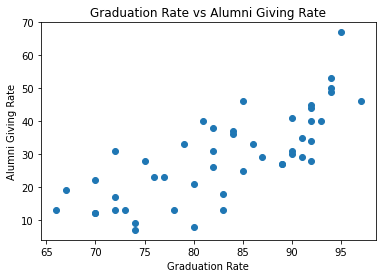

In [35]:
plt.scatter(ag.grad_rate, ag.alumni_giving_rate)
plt.title('Graduation Rate vs Alumni Giving Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Alumni Giving Rate')
plt.show()

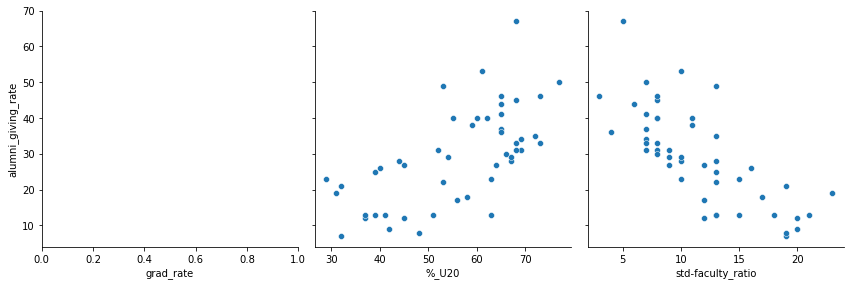

In [39]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(ag, x_vars=['grad_rate', '%_U20', 'std-faculty_ratio'],
            y_vars='alumni_giving_rate', height=4, aspect=1, kind='scatter')
plt.show()

In [1]:
variables = ['alumni_giving_rate', 'grad_rate', '%_U20', 'std-faculty_ratio']

C:\Users\Tym\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


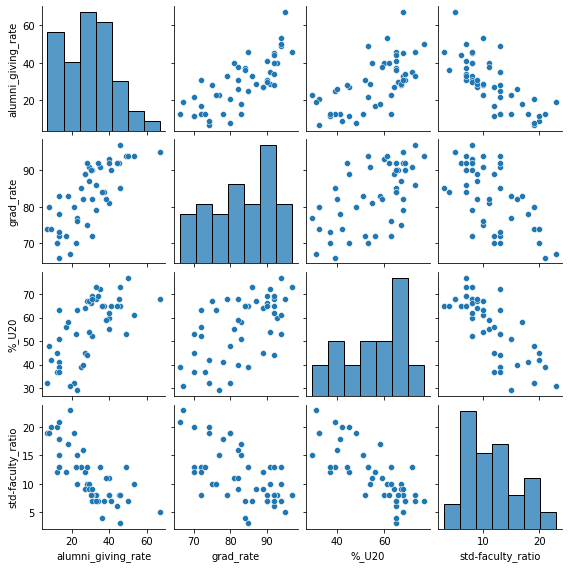

In [6]:
sns.pairplot(ag[variables], size=2)

NameError: name 'model' is not defined

In [16]:
features=['grad_rate']
outcome=['alumni_giving_rate']
x1=ag[features]
y1=ag[outcome]

In [23]:
regressor=LinearRegression()
model=regressor.fit(x1,y1)

In [27]:
print(model.intercept_)

[-68.76118278]


In [25]:
print(model.coef_)

[[1.180516]]


In [22]:
print('R Squared: ',model.score(x1,y1)

SyntaxError: unexpected EOF while parsing (<ipython-input-22-760d4daad521>, line 1)

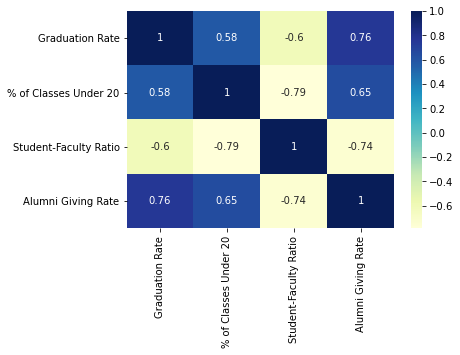

In [4]:
# Visualizing the data using heatmap
sns.heatmap(ag.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [6]:
# Performing linear regression using `grad_rate` as our feature variable
# Y=C+M*"alumni_giving_rate"

# 1. Create X and y
# 2. Create Train and Test set
# 3. Train your model
# 4. Evaluate the model

In [8]:
# Creating x and y, feature & outcome/target variable
x = ag['grad_rate']
y = ag['alumni_giving_rate']

In [10]:
# Splitting the varaibles as training and testing(7:3 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [12]:
y_train.head()

35    26
33    23
7     31
45    38
20    67
Name: alumni_giving_rate, dtype: int64

In [15]:
## Statsmodels.api
# Adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

In [16]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# Printing the parameters
lr.params

const       -75.650788
grad_rate     1.266405
dtype: float64

In [17]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     alumni_giving_rate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     40.07
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           4.81e-07
Time:                        15:06:32   Log-Likelihood:                -118.45
No. Observations:                  33   AIC:                             240.9
Df Residuals:                      31   BIC:                             243.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.6508     16.879     -4.482      0.000    -110.075     -41.227
grad_rate      1.2664      0.200      6.330      0.000       0.858       1.674
==============================================================================
Omnibus:                        0.517   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.239
Skew:                           0.208   Prob(JB):                        0.887
Kurtosis:                       2.968   Cond. No.                         905.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

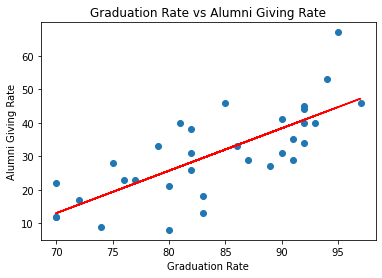

In [19]:
# alumni_giving_rate = 1.2664*'grad_rate' - 75.6508
plt.scatter(x_train,y_train)
plt.title('Graduation Rate vs Alumni Giving Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Alumni Giving Rate')
plt.plot(x_train,1.2664*x_train - 75.6508, 'r')
plt.show()

In [21]:
## Residual Analysis

In [22]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(x_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\Tym\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


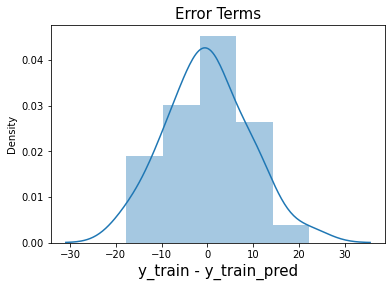

In [23]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 5)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

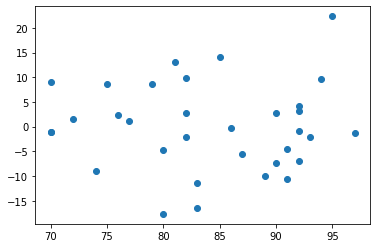

In [24]:
# Looking for any patterns in the residuals(should not have a pattern)
plt.scatter(x_train, res)
plt.show()

In [25]:
## Predictions on the Test data or Evaluating the model

In [26]:
# Adding a constant to x_test
x_test_sm = sm.add_constant(x_test)

# Predicting the y values corresponding to x_test_sm
y_test_pred = lr.predict(x_test_sm)

# Printing the first 15 predicted values
y_test_pred

6     37.059300
28    23.128840
32     9.198379
26    18.063218
41    40.858517
47    43.391328
5     15.530407
40     7.931974
18    38.325706
31    30.727273
0     31.993678
11    30.727273
36    43.391328
17    15.530407
43    16.796812
dtype: float64

In [28]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.5388600932467233

In [ ]:
# Since the R² value on test data is within 5% of the R² value on training data, 
# we can conclude that the model is pretty stable. 
# Which means, what the model has learned on the training set can generalize on the unseen test set.

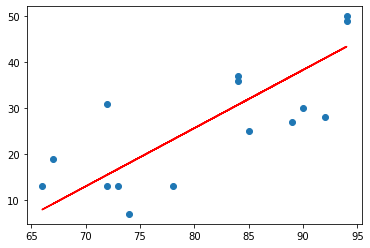

In [29]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

In [30]:
## sklearn

In [32]:
# Splitting the data into train and test
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [33]:
# Shape of the train set without adding column
x_train_lm.shape

# Adding additional column to the train and test data
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

print(x_train_lm.shape)
print(x_test_lm.shape)

(33, 1)
(15, 1)


In [34]:
# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [35]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : -75.65078799750688
Slope : [1.26640548]


In [37]:
# Making Predictions of y_value
y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5638114755869994
0.5388600932467238


In [ ]:
# five steps to build the simple linear regression model:
# 1.Reading and understanding the data
# 2.Visualizing the data
# 3.Performing simple linear regression
# 4.Residual analysis
# 5.Predictions on the test set